# Sandpiles

Daniel Koehn

Schwentinental, 25th of December 2020

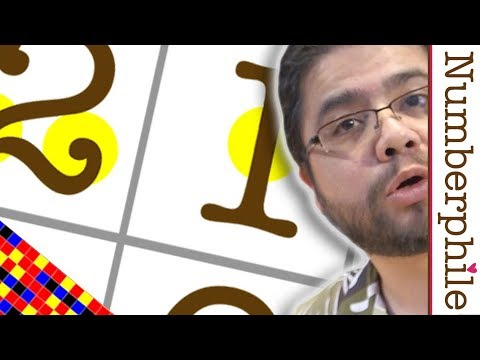

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('1MtEUErz7Gg')

In [2]:
# Import libraries
import numpy
from matplotlib import pyplot

# import JIT from Numba
from numba import jit

In [3]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

## Sandpiles

In [9]:
# define parameters here
nx = 600
nz = 600

# Position of initial sandpile
I0 = (int)(nx/2)
J0 = (int)(nz/2)

# amount of sand of initial sandpile
#sand = 750000
#sand = 400000
sand = 1e6

In [10]:
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def topple_interior(sandpile,nx,nz):
    
    count = 0
    for i in range(1,nx):
        for j in range(1,nz):
            
            if(sandpile[j,i]>3):  
                
                sandpile[j+1,i] += 1
                sandpile[j-1,i] += 1
                sandpile[j,i+1] += 1
                sandpile[j,i-1] += 1
                sandpile[j,i] -= 4
                
                count +=1
    return count

In [11]:
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def topple_boundaries(sandpile,nx,nz):
    
    count1 = 0
    # top and bottom boundary 
    for i in range(1,nx):        
        
            if(sandpile[-1,i]>3):  
                                
                sandpile[-2,i] += 1
                sandpile[-1,i+1] += 1
                sandpile[-1,i-1] += 1
                sandpile[-1,i] -= 4
                
                count1 +=1
                
            if(sandpile[0,i]>3):  
                                
                sandpile[1,i] += 1
                sandpile[0,i+1] += 1
                sandpile[0,i-1] += 1
                sandpile[0,i] -= 4
                
                count1 +=1  
                
    # left and right boundary 
    for j in range(1,nz):        
        
            if(sandpile[j,-1]>3):  
                                
                sandpile[j,-2] += 1
                sandpile[j+1,-1] += 1
                sandpile[j-1,-1] += 1
                sandpile[j,-1] -= 4
                
                count1 +=1
           
            if(sandpile[j,0]>3):  
                                
                sandpile[j,1] += 1
                sandpile[j+1,0] += 1
                sandpile[j-1,0] += 1
                sandpile[j,0] -= 4
                
                count1 +=1
    
    # top left corner
    if(sandpile[-1,0]>3):  
                                
        sandpile[-1,1] += 1
        sandpile[-2,0] += 1
        sandpile[-1,0] -= 4
        
        count1 +=1            

    # bottom left corner
    if(sandpile[0,0]>3):  
                                
        sandpile[0,1] += 1
        sandpile[1,0] += 1
        sandpile[0,0] -= 4
        
        count1 +=1            

    # top right corner
    if(sandpile[-1,-1]>3):  
                                
        sandpile[-2,-1] += 1
        sandpile[-1,-2] += 1
        sandpile[-1,-1] -= 4
        
        count1 +=1            

    # bottom right corner
    if(sandpile[0,-1]>3):  
                                
        sandpile[1,-1] += 1
        sandpile[0,-2] += 1
        sandpile[0,-1] -= 4
        
        count1 +=1    
        
    return count1

In [12]:
# create initial sandpile
sandpile = numpy.zeros((nz+1,nx+1))
sandpile[J0,I0] = sand 

count = 1
count1 = 0
iter = 0
# redistribute sand
while (count > 0 or count1 > 0):
    count = topple_interior(sandpile,nx,nz)
    count1 = topple_boundaries(sandpile,nx,nz)
    iter += 1
print('iterations = ', iter)

iterations =  1127368


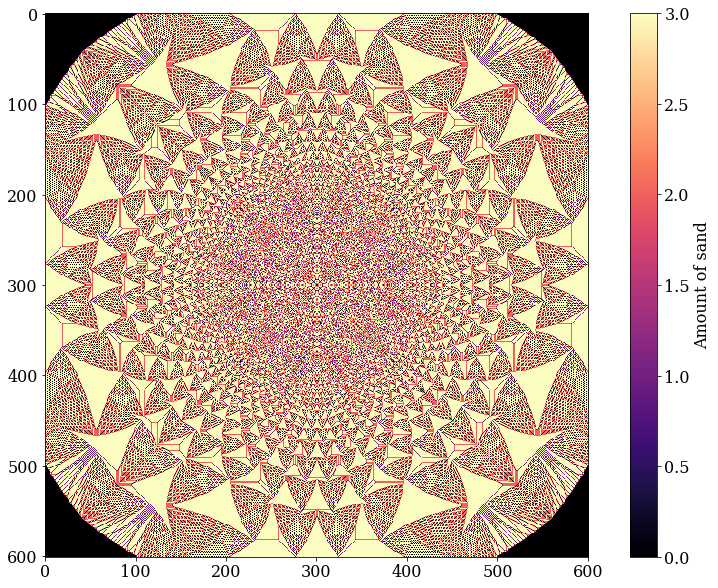

In [13]:
# Plot final sandpile
fig = pyplot.figure(figsize=(15., 10.))
pyplot.tight_layout()
cmap = 'magma'
im = pyplot.imshow(sandpile, interpolation='none', cmap=cmap)
cbar = pyplot.colorbar(im)
cbar.set_label('Amount of sand')

# save sandpile as pdf 
pyplot.savefig('sandpile.jpeg', bbox_inches='tight', dpi=150)
pyplot.show()